In [ ]:
#%%

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import sklearn.linear_model as lm
import sqlite3

def criar_banco():
    conn = sqlite3.connect('banco.db')
    cursor = conn.cursor()
    conn.commit()
    conn.close()
    
def importar_csv():
    df = pd.read_csv('dataset\global_terrorism.csv', usecols=['iyear', 'country_txt'])
    conn = sqlite3.connect('banco.db')
    df.to_sql('dados', conn, if_exists='replace', index=False)
    conn.close()

def paises_atentados():
        con = sqlite3.connect('banco.db')
        df = pd.read_sql_query("""
           SELECT country_txt, COUNT(*) as count
           FROM dados
           GROUP BY country_txt
           ORDER BY count DESC
           LIMIT 10
        """, con)
        plt.figure(figsize=(11, 6))
        plt.bar(df['country_txt'], df['count'])
        plt.xlabel('País')
        plt.grid(axis='y')
        plt.ylabel('Número de Atentados')
        plt.title('Top 10 Países com Mais Atentados')
        plt.xticks(rotation=45)
        plt.show()
        con.close()

def atentados_ao_longo_do_tempo():
    con = sqlite3.connect('banco.db')
    df = pd.read_sql_query("""
       SELECT iyear AS ano, COUNT(*) AS num_atentados
       FROM dados
       GROUP BY iyear
       ORDER BY iyear
    """, con)
    con.close()

    x = df['ano'].values.reshape(-1, 1)
    y = df['num_atentados'].values
    modelo = lm.LinearRegression()
    modelo.fit(x, y)
    predicao_atual = modelo.predict(x)

    # Previsão para os próximos 20 anos
    ultimo_ano = df['ano'].max()
    anos_futuros = np.arange(ultimo_ano + 1, ultimo_ano + 50).reshape(-1, 1)
    predicao_futura = modelo.predict(anos_futuros)

    # Combinar anos e predições (histórico e futuro)
    x_completo = np.vstack((x, anos_futuros))
    predicao_completa = np.concatenate((predicao_atual, predicao_futura))

    plt.figure()
    plt.scatter(x, y, label="Dados Reais")
    plt.plot(x_completo, predicao_completa, color='red', label="Projeção")
    plt.xlabel('Ano')
    plt.ylabel('Número de Atentados')
    plt.title('Projeção de 20 Anos')
    plt.legend()
    plt.show()

In [ ]:
#%%

def atentados_por_pais(pais):
    con = sqlite3.connect('banco.db')
    df = pd.read_sql_query(f"""
       SELECT iyear AS ano, COUNT(*) AS num_atentados
       FROM dados
       WHERE country_txt = '{pais}'
       GROUP BY iyear
       ORDER BY iyear
    """, con)
    con.close()

    x = df['ano'].values.reshape(-1, 1)
    y = df['num_atentados'].values
    modelo = lm.LinearRegression()
    modelo.fit(x, y)
    predicao_atual = modelo.predict(x)

    # Previsão para os próximos 20 anos
    ultimo_ano = df['ano'].max()
    anos_futuros = np.arange(ultimo_ano + 1, ultimo_ano + 50).reshape(-1, 1)
    predicao_futura = modelo.predict(anos_futuros)

    # Combinar anos e predições (histórico e futuro)
    x_completo = np.vstack((x, anos_futuros))
    predicao_completa = np.concatenate((predicao_atual, predicao_futura))

    plt.figure()
    plt.scatter(x, y, label="Dados Reais")
    plt.plot(x_completo, predicao_completa, color='red', label="Projeção")
    plt.xlabel('Ano')
    plt.ylabel('Número de Atentados')
    plt.title(f'Projeção de 20 Anos para {pais}')
    plt.legend()
    plt.show()

In [ ]:
#%%

criar_banco()

In [ ]:
#%%

##importar_csv()

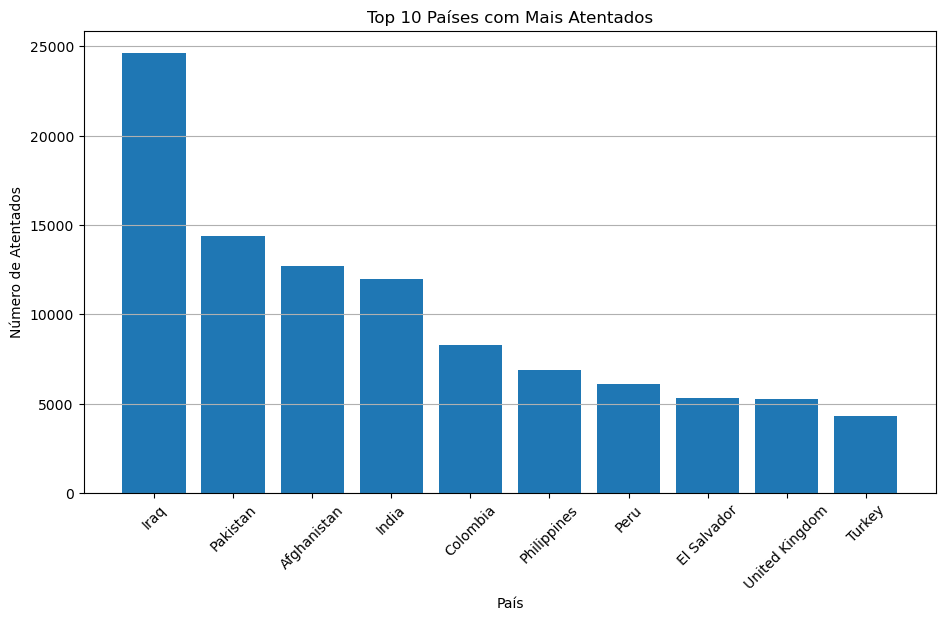

In [ ]:
#%%

paises_atentados()

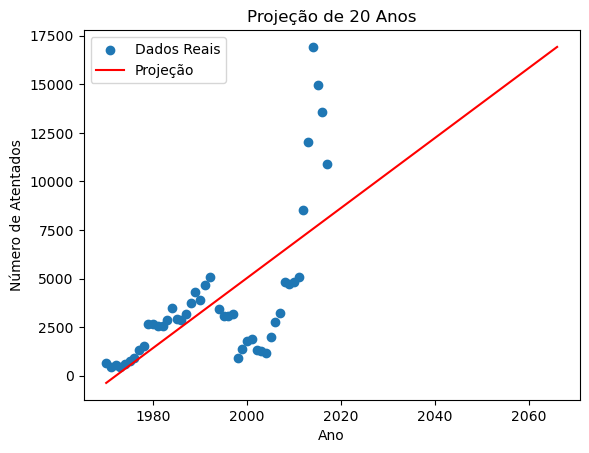

In [ ]:
# %%

atentados_ao_longo_do_tempo()

In [ ]:
#%% IRAQUE LIDERA OS ATENTADOS DESDE 1970

con = sqlite3.connect('banco.db')
df = pd.read_sql_query("""
           SELECT country_txt, COUNT(*) as count
           FROM dados
           GROUP BY country_txt
           ORDER BY count DESC
           LIMIT 10
        """, con)
con.close()
df

,country_txt,count
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306
5,Philippines,6908
6,Peru,6096
7,El Salvador,5320
8,United Kingdom,5235
9,Turkey,4292


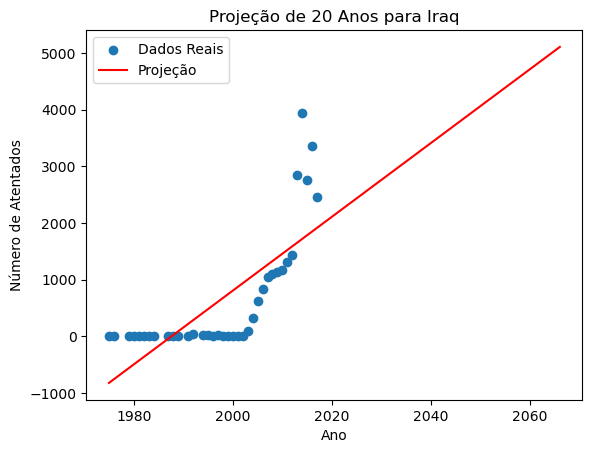

In [ ]:
# %%

atentados_por_pais('Iraq')

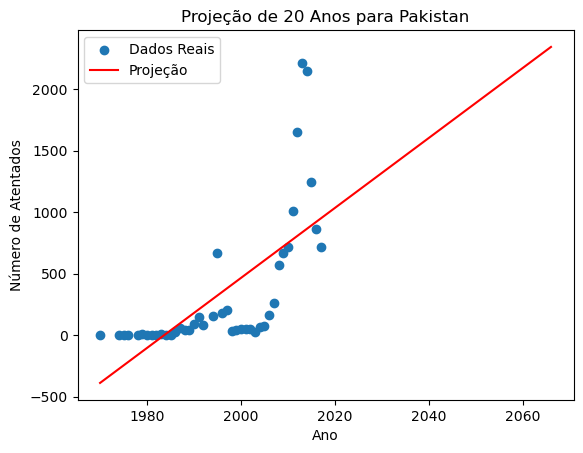

In [ ]:
# %%

atentados_por_pais('Pakistan')

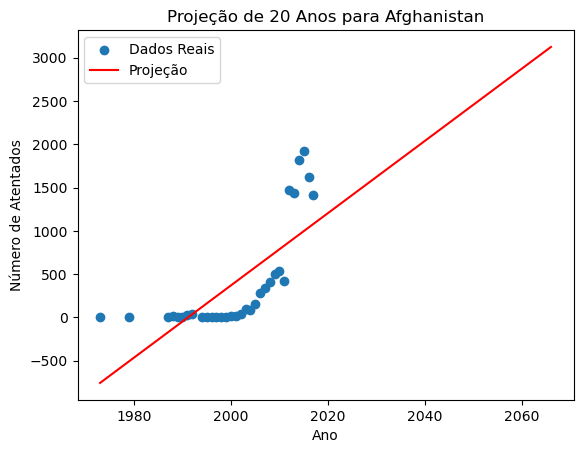

In [ ]:
#%%

atentados_por_pais('Afghanistan')